<a href="https://colab.research.google.com/github/ayuannisa5/PythonProject/blob/master/Customer_segmentation_%26_market_basket_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection

In [0]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Uncomment the following lines if you haven't mount to your drive. 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Online Retail 2.csv')

In [0]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [0]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [0]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [0]:
data.shape

(541909, 8)

# Data Cleansing

In [0]:
#drop missing value in description
data = data.dropna(axis=0,subset = ['Description']) 

In [0]:
data.shape

(540455, 8)

In [0]:
#drop InvoiceNo previx by C 
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data = data[~data['InvoiceNo'].str.contains('C')]

In [0]:
data.shape

(531167, 8)

In [0]:
data = data[~(data.CustomerID.isnull())]     

In [0]:
data.shape

(397924, 8)

In [0]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Exploratory Data Analysis 

In [0]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


1. Top Ten Country

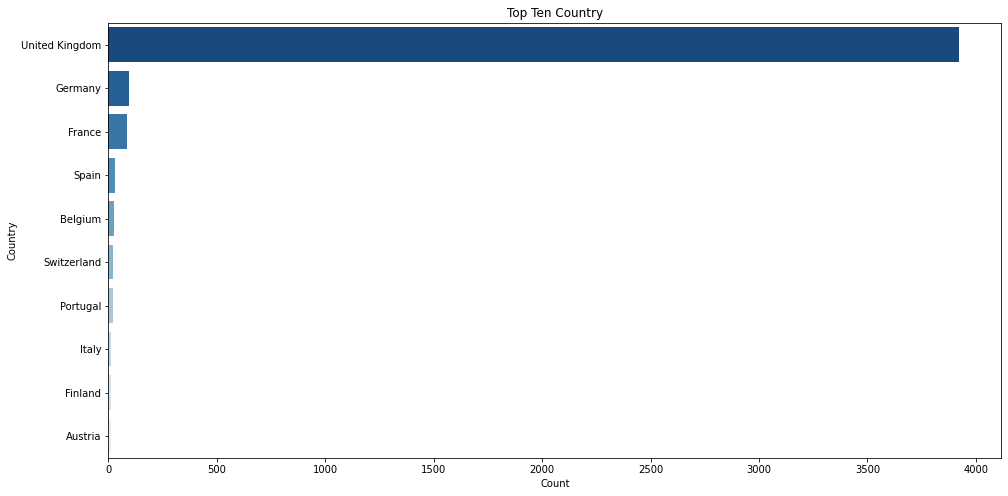

In [0]:
data_topctr =data[['Country','CustomerID']].drop_duplicates()
data_topctr = data_topctr.groupby('Country').size().sort_values(ascending=False).reset_index().rename(columns={0:'Count'}).head(10)
fig,ax=plt.subplots(figsize=(16,8))

ax = sns.barplot(y = 'Country', x='Count', data=data_topctr, palette='Blues_r').set(title='Top Ten Country')


2. Monthly active customer in UK?

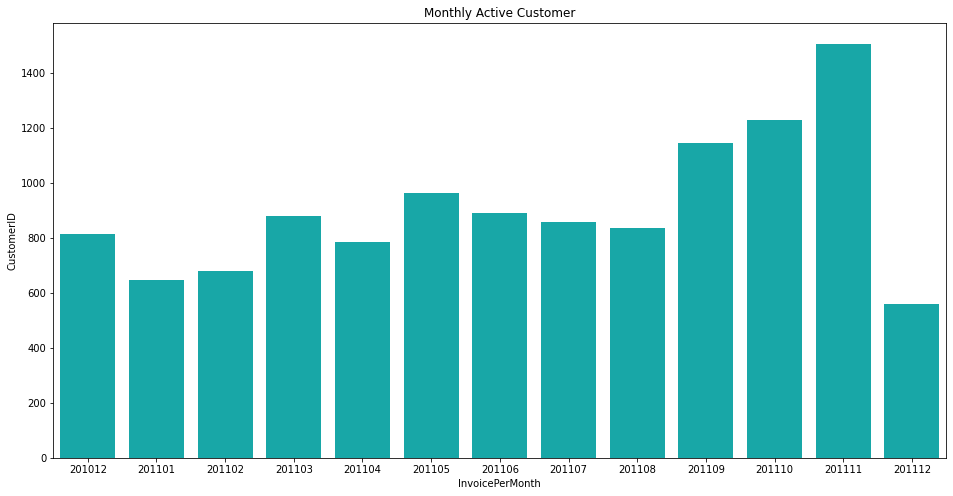

In [0]:
#converting the type of Invoice Date Field from string to datetime.
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoicePerMonth'] = data['InvoiceDate'].map(lambda date:  100*date.year + date.month)

#creating a new dataframe with UK customers only
data_uk = data.query("Country=='United Kingdom'").reset_index(drop=True)

#creating monthly active customers dataframe by counting unique Customer IDs

data_monthly_cust = data_uk.groupby('InvoicePerMonth')['CustomerID'].nunique().reset_index()

#print the dataframe
data_monthly_cust

#plotting the output

fig,ax=plt.subplots(figsize=(16,8))

ax = sns.barplot(y = 'CustomerID', x='InvoicePerMonth', data=data_monthly_cust, color='c').set(title='Monthly Active Customer')


3. Total Order per month

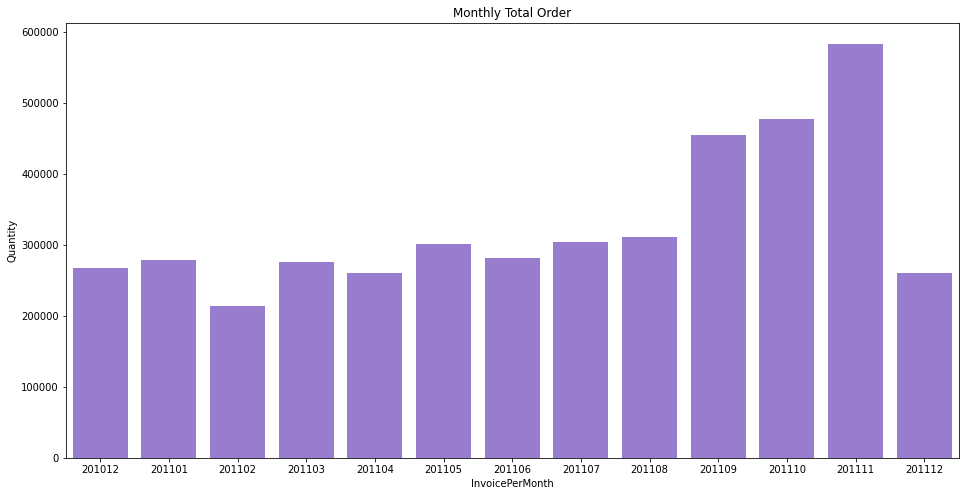

In [0]:
#create a new dataframe for no. of order by using quantity field
data_monthly_sales = data_uk.groupby('InvoicePerMonth')['Quantity'].sum().reset_index()

#print the dataframe
data_monthly_sales

fig,ax=plt.subplots(figsize=(16,8))

ax = sns.barplot(y = 'Quantity', x='InvoicePerMonth', data=data_monthly_sales, color='mediumpurple').set(title='Monthly Total Order')

4. Most purchase items

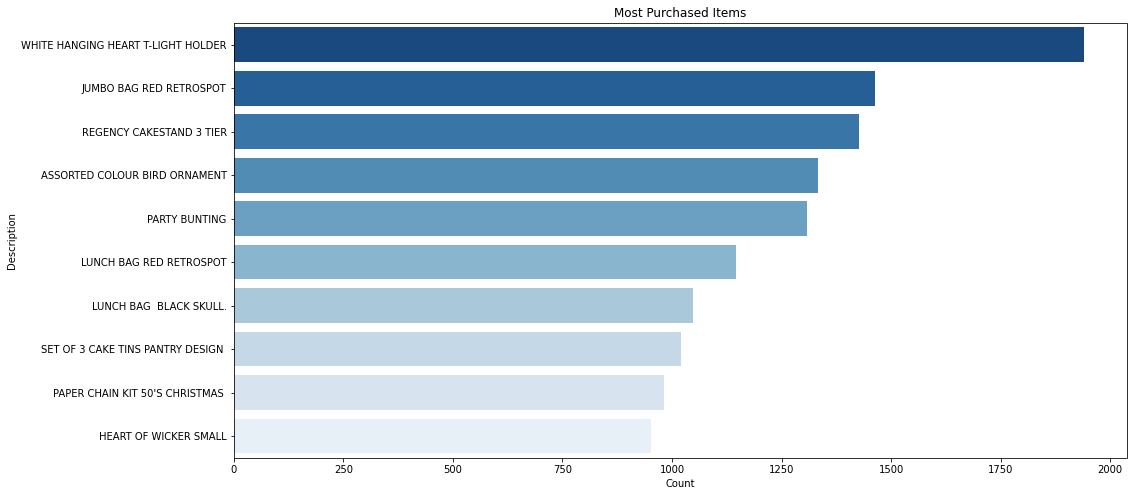

In [0]:

data_mostItems = data_uk[data_uk.UnitPrice>0].reset_index(drop=True)

data_mostItems = data_mostItems.groupby('Description').size().sort_values(ascending=False).reset_index().rename(columns={0:'Count'}).head(10)
fig,ax=plt.subplots(figsize=(16,8))

ax = sns.barplot(y = 'Description', x='Count', data=data_mostItems, palette='Blues_r').set(title='Most Purchased Items')


5. Monthly Revenue

In [0]:
data['Revenue'] = data['UnitPrice'] * data['Quantity']
data_revenue = data.groupby(['InvoicePerMonth'])['Revenue'].sum().reset_index()
data_revenue


,InvoicePerMonth,Revenue
0,201012,572713.890
1,201101,569445.040
2,201102,447137.350
3,201103,595500.760
4,201104,469200.361
5,201105,678594.560
6,201106,661213.690
7,201107,600091.011
8,201108,645343.900
9,201109,952838.382


6. Most Expensive Item

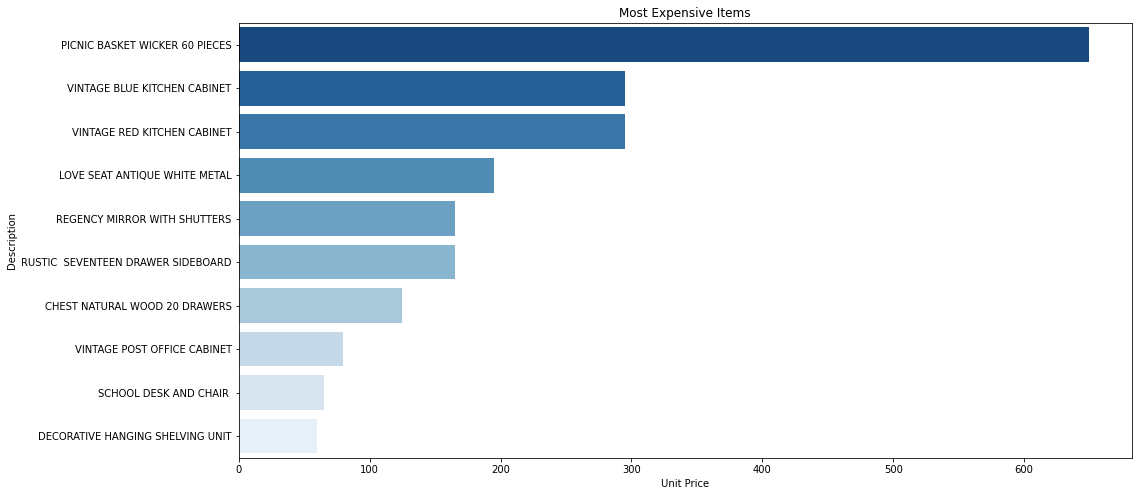

In [0]:
data_items = data[~data.StockCode.str.contains('[A-Za-z]')].sort_values('UnitPrice').reset_index(drop=True).groupby('Description')['UnitPrice'].max().sort_values(ascending=False)

fig,ax=plt.subplots(figsize=(16,8))
ax = sns.barplot(y = data_items.index[:10], x=data_items.values[:10], palette='Blues_r').set(title='Most Expensive Items', xlabel='Unit Price')

# Customer Segmentation

Customer Segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits.

We will using RFM methode to analyze the customer segmentation. RFM stands for Recency - Frequency - Monetary Value. 

For Recency, Calculate the number of days between present date and date of last purchase each customer.

For Frequency, Calculate the number of orders for each customer.

For Monetary, Calculate sum of purchase price for each customer.

Theoretically we will have segments like below:

Low Value: Customers who are less active than others, not very frequent buyer/visitor and generates very low - zero - maybe negative revenue.

Mid Value: In the middle of everything. Often using our platform (but not as much as our High Values), fairly frequent and generates moderate revenue.

High Value: The group we don’t want to lose. High Revenue, Frequency and low Inactivity.

# RECENCY

In [0]:
data.describe()

,Quantity,UnitPrice,CustomerID,InvoicePerMonth,Revenue
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,201101.038417,22.394749
std,180.420210,22.096788,1713.169877,23.836517,309.055588
min,1.000000,0.000000,12346.000000,201012.000000,0.000000
25%,2.000000,1.250000,13969.000000,201104.000000,4.680000
50%,6.000000,1.950000,15159.000000,201107.000000,11.800000
75%,12.000000,3.750000,16795.000000,201110.000000,19.800000
max,80995.000000,8142.750000,18287.000000,201112.000000,168469.600000


The data is not clean. There's still negative values for Quantity and Price

In [0]:
clean_data = data[(data.Quantity>0)&(data.UnitPrice>0)].reset_index(drop=True)
clean_data.shape

(397884, 10)

In [0]:
#get the max purchase date for each customer and create a dataframe with itrecency 
data_recency = pd.DataFrame(clean_data.CustomerID).merge(pd.DataFrame((clean_data.InvoiceDate.max()-clean_data.InvoiceDate).dt.days).rename(columns={'InvoiceDate':'Recency'}), left_index=True, right_index=True)
data_recency = pd.DataFrame(data_recency.groupby('CustomerID')['Recency'].min()).reset_index()

data_recency

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4333,18280.0,277
4334,18281.0,180
4335,18282.0,7
4336,18283.0,3


In [0]:
#get order counts for each user and create a dataframe with it
data_frequency = clean_data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
data_frequency.columns = ['CustomerID','Frequency']
data_frequency

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4333,18280.0,1
4334,18281.0,1
4335,18282.0,2
4336,18283.0,16


# MONETARY

In [0]:
#calculate monetary for each customer
clean_data['Monetary'] = clean_data['UnitPrice'] * clean_data['Quantity']
data_monetary = clean_data.groupby('CustomerID')['Monetary'].sum().reset_index()
data_monetary.columns = ['CustomerID','Monetary']

data_monetary

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2094.88


In [0]:
#@title
data_user = data_monetary.merge(data_recency,on='CustomerID').merge(data_frequency,on='CustomerID')

#cust_seg['Behavior'] = cust_seg.Behavior.astype('int')
data_id = data_user.CustomerID
data_user = data_user.drop(columns=['CustomerID'])
data_user



,Monetary,Recency,Frequency
0,77183.60,325,1
1,4310.00,1,7
2,1797.24,74,4
3,1757.55,18,1
4,334.40,309,1
...,...,...,...
4333,180.60,277,1
4334,80.82,180,1
4335,178.05,7,2
4336,2094.88,3,16


In [0]:
data_user.head()

,Monetary,Recency,Frequency
0,77183.60,325,1
1,4310.00,1,7
2,1797.24,74,4
3,1757.55,18,1
4,334.40,309,1


# Distribution

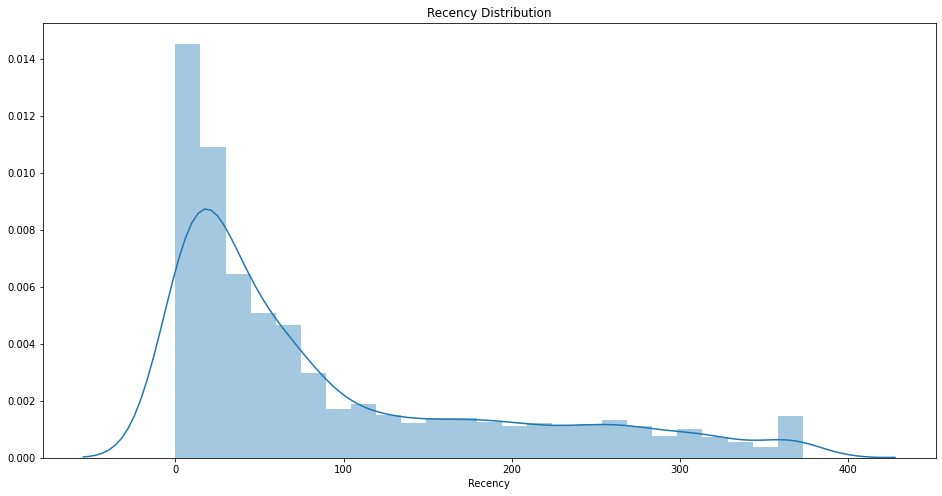

In [0]:
#Recency

fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

ax = sns.distplot(data_user.Recency).set(title='Recency Distribution')

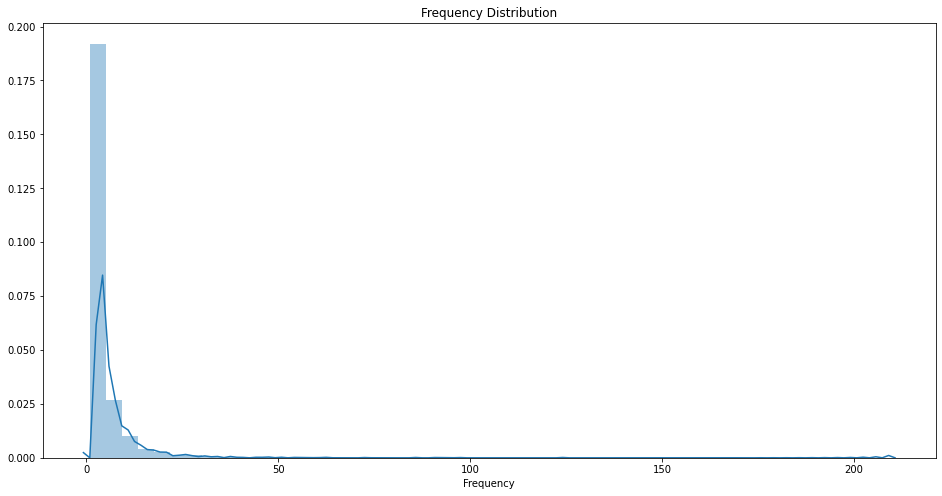

In [0]:
#Frequency

fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

ax = sns.distplot(data_user.Frequency).set(title='Frequency Distribution')

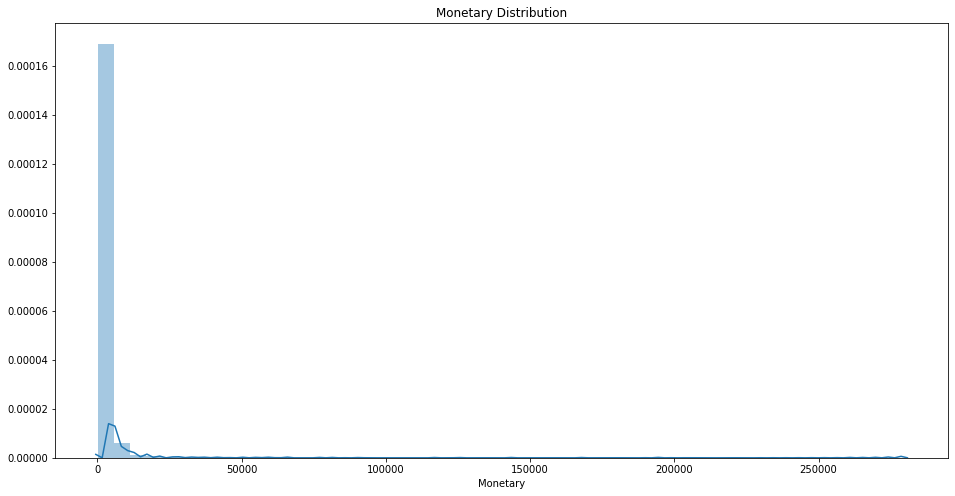

In [0]:
#Monetary

fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

ax = sns.distplot(data_user.Monetary).set(title='Monetary Distribution')

# Data Transform

In [0]:
from sklearn.preprocessing import PowerTransformer, StandardScaler

power = PowerTransformer().fit(data_user)
X_scaled =power.transform(data_user)

#Standard Scaler to Scale the data
scaler = StandardScaler().fit(X_scaled)
X_scaled = scaler.transform(X_scaled)

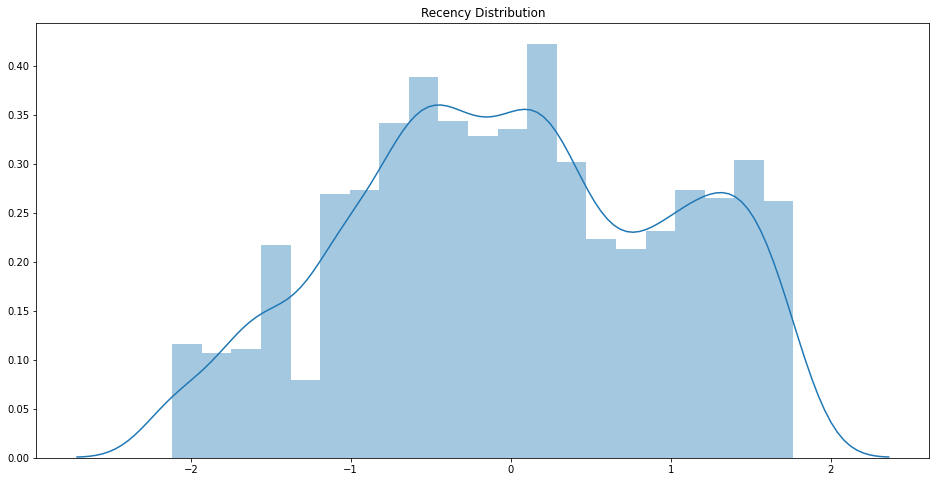

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

ax = sns.distplot(X_scaled[:,1]).set(title='Recency Distribution')

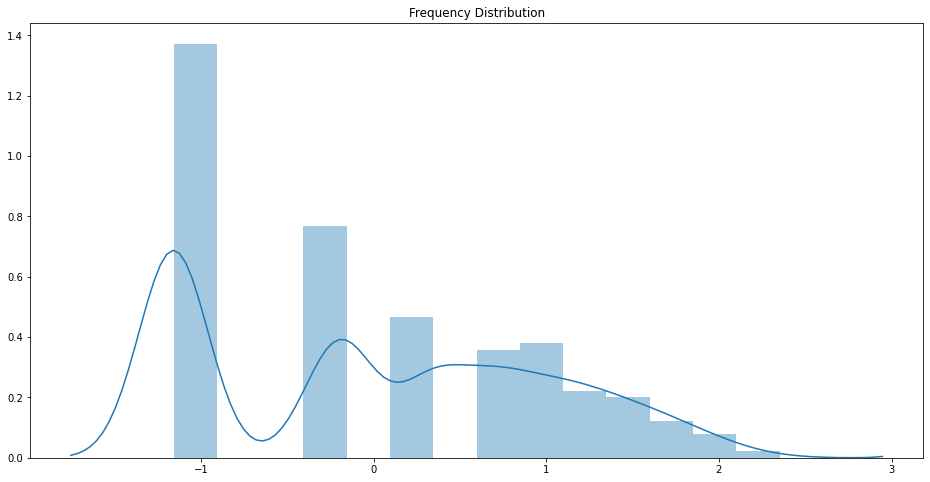

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

ax = sns.distplot(X_scaled[:,2]).set(title='Frequency Distribution')

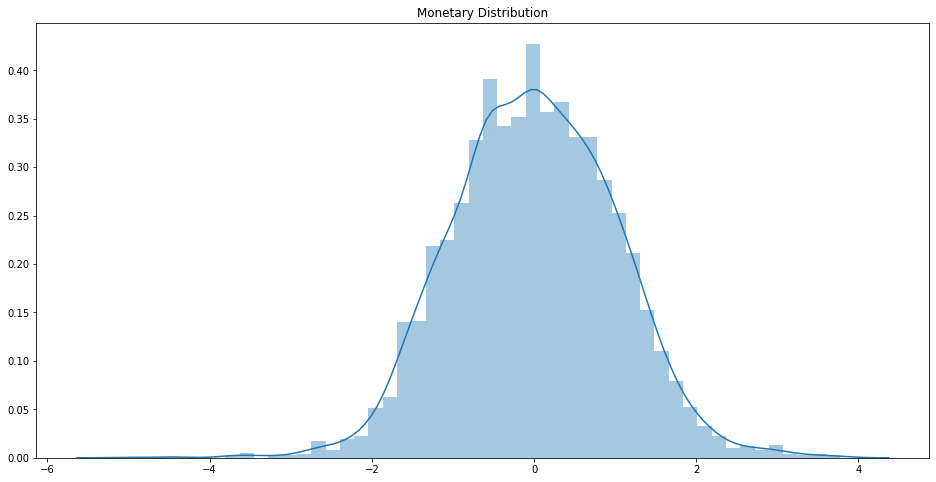

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

ax = sns.distplot(X_scaled[:,0]).set(title='Monetary Distribution')

# K-Means

To define the "k" value, we will using Elbow Method

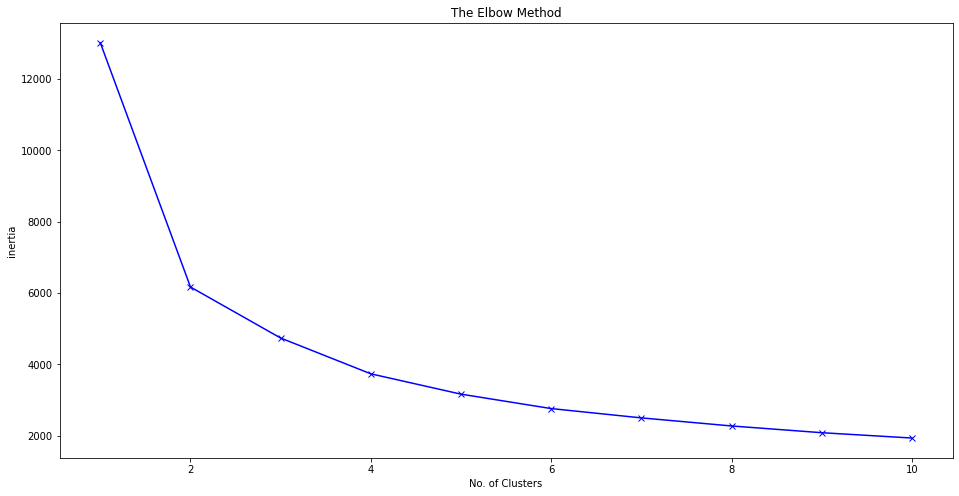

In [0]:
#Elbow Method
from sklearn.cluster import KMeans
inertia=[]
cl = 10

for i in range(1,cl+1):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


fig,ax = plt.subplots()
fig.set_size_inches(16, 8)


plt.plot(range(1,cl+1), inertia, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('inertia')
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.4324994851303691
For n_clusters = 3 The average silhouette_score is : 0.3271530187430326
For n_clusters = 4 The average silhouette_score is : 0.3329626862802199
For n_clusters = 5 The average silhouette_score is : 0.32269678427274023
For n_clusters = 6 The average silhouette_score is : 0.317846472225869


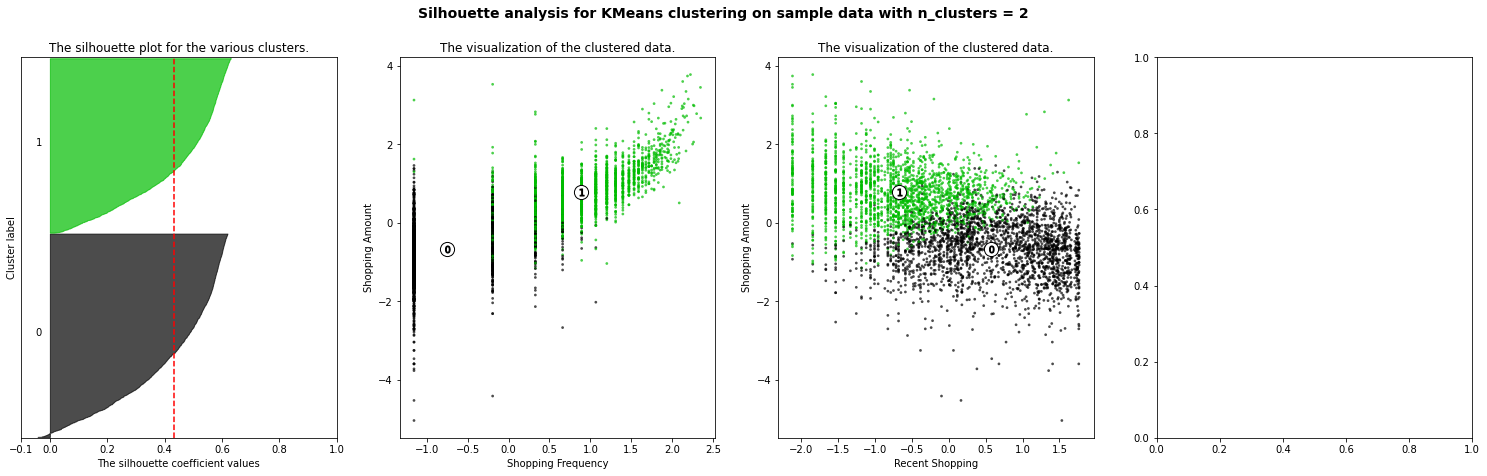

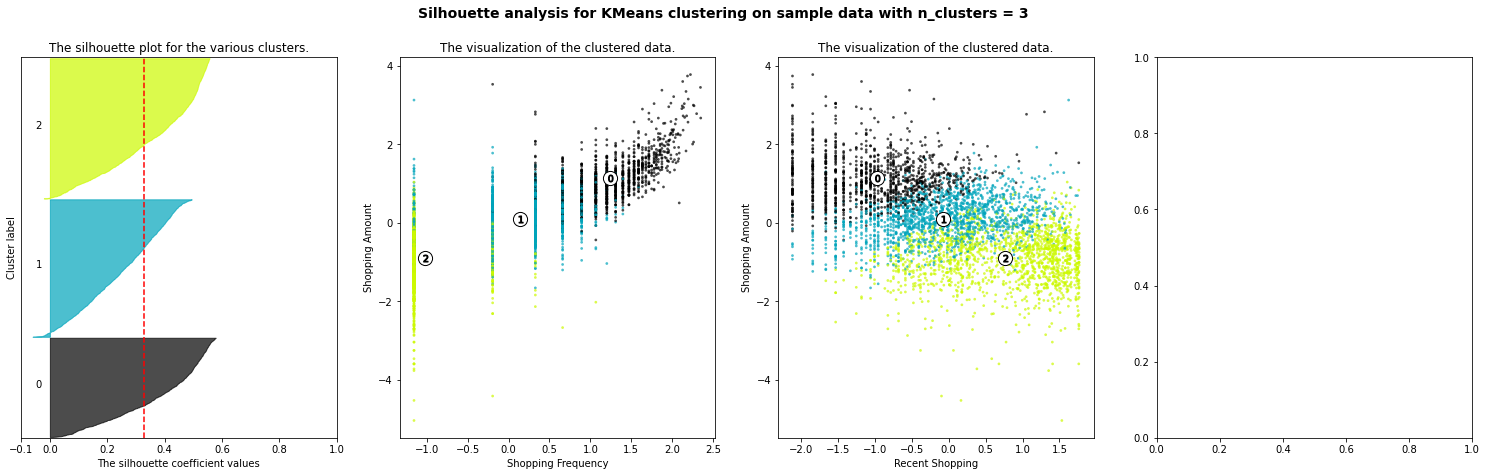

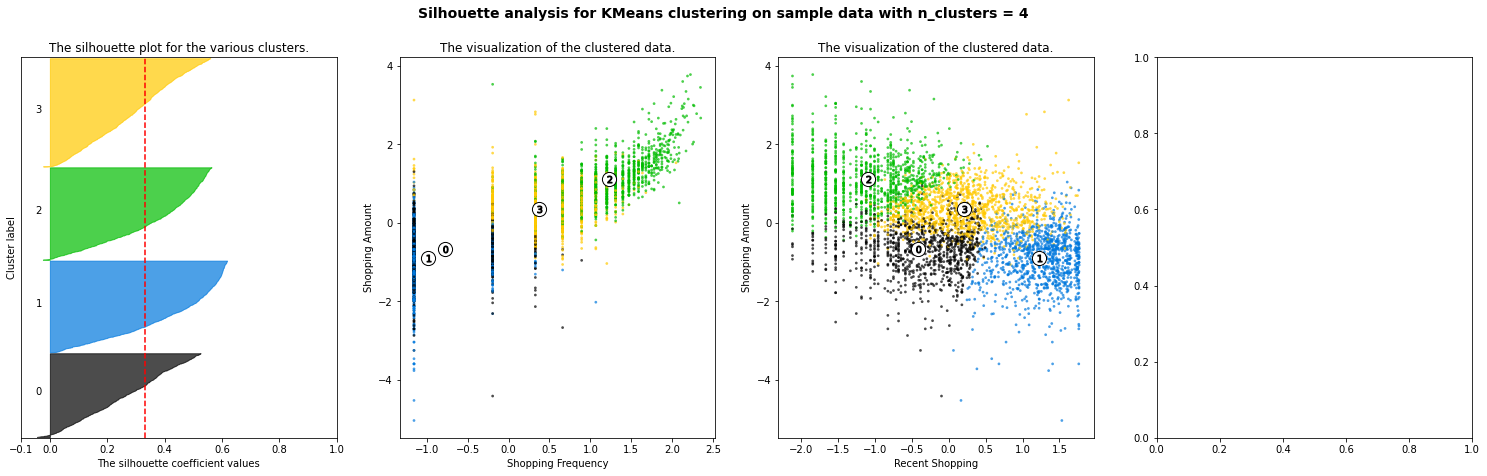

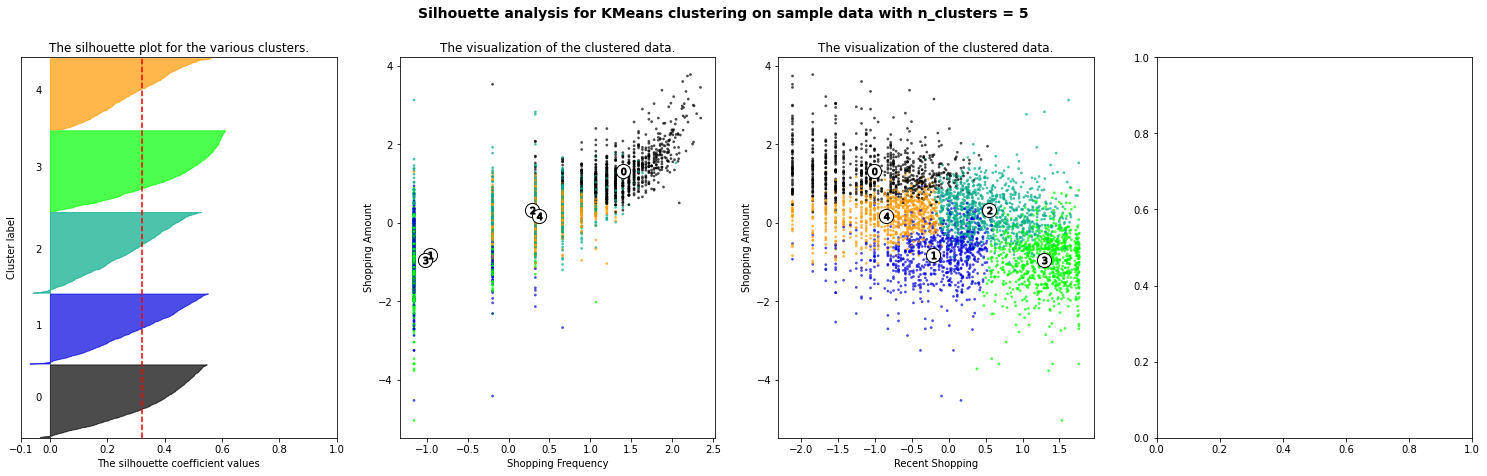

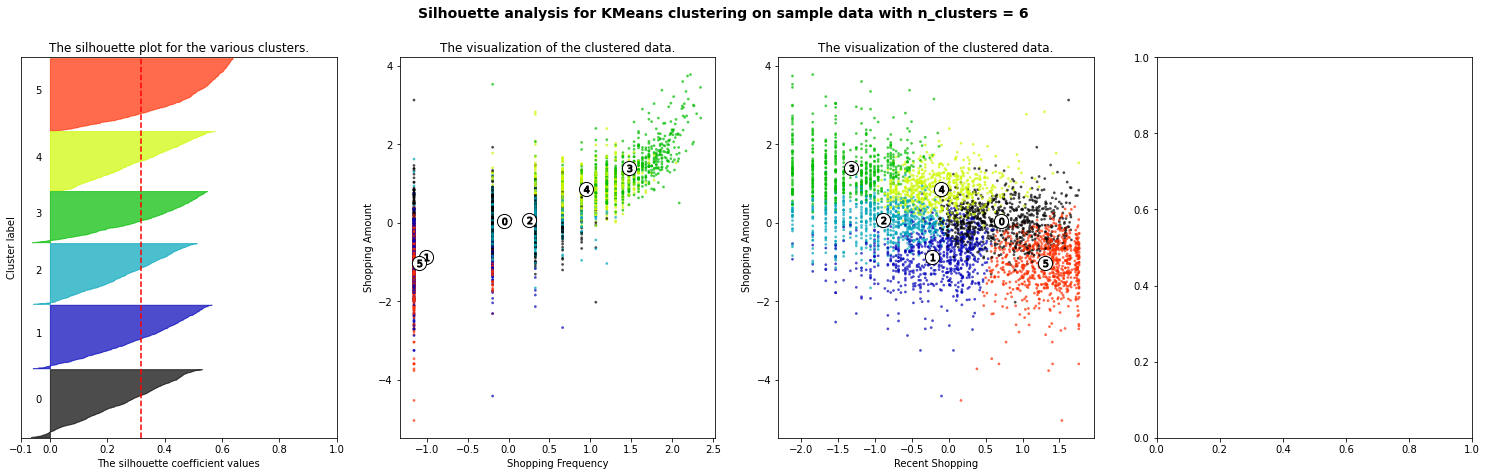

In [0]:

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm



range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    fig.set_size_inches(26, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for insertinzg blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_scaled[:, 2], X_scaled[:, 0], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 2], centers[:, 0], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[2], c[0], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Shopping Frequency")
    ax2.set_ylabel("Shopping Amount")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    
        # 3nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax3.scatter(X_scaled[:, 1], X_scaled[:, 0], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax3.scatter(centers[:, 1], centers[:, 0], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax3.scatter(c[1], c[0], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax3.set_title("The visualization of the clustered data.")
    ax3.set_xlabel("Recent Shopping")
    ax3.set_ylabel("Shopping Amount")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    
    '''
    # 4nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax4.scatter(X_scaled[:, 1], X_scaled[:, 0], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax4.scatter(centers[:, 1], centers[:, 0], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax4.scatter(c[1], c[0], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax4.set_title("The visualization of the clustered data.")
    ax4.set_xlabel("Shopping Periode")
    ax4.set_ylabel("Shopping Amount")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    '''

plt.show()


Based on the result above, we can see the best K suggest is 5

In [0]:
n = 5

model = KMeans(n_clusters= n, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(X_scaled)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = model.labels_

centers = model.cluster_centers_

In [0]:
#Append labels/clusters to scaled and original dataframe
data_user['cluster'] = labels
gg = pd.DataFrame(X_scaled,columns=['Monetary','Recency','Frequency'])
gg['Cluster'] = labels+1

In [0]:

import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(
    x=gg.Monetary,
    y=gg.Recency,
    z=gg.Frequency,
    mode='markers',
    marker=dict(
        size=4,
        color=gg.Cluster,                # set color to an array/list of desired values
        colorscale='Portland',   # choose a colorscale
        opacity=0.4,
        showscale=True
    ),
    showlegend=False
)])

fig.add_trace(go.Scatter3d(
    x=centers[:,0],
    y=centers[:,1],
    z=centers[:,2],
    mode='markers+text',
    marker=dict(color='black',size=5),
    text=['1','2','3','4','5','6'],
    textposition="top center",
    textfont=dict(
        family="sans serif",
        size=22,
        color="black"
    ),
    showlegend=False
))

print('Clusters')

fig.update_layout(scene = dict(
                    xaxis_title='Monetary',
                    yaxis_title='Recency',
                    zaxis_title='Frequency'),
                    margin=dict(r=20, b=10, l=10, t=10))


fig.show()

Clusters


In [0]:
clusters = []

for i in range(0,n):
    clusters.append(data_user[data_user.cluster==i])

values = power.inverse_transform(scaler.inverse_transform(centers))

for i in range(0,n):
    print('-----CLUSTER {}-----'.format(i+1))
    print('Number of Customers: {}'.format(clusters[i].shape[0]))
    print('Purchases Amonunt: £{:6.2f}'.format(values[i][0]))
    print('Purchases Frequency : {:4.0f}'.format(values[i][2]))
    print('Recency: {:4.0f}\n'.format(values[i][1]))

-----CLUSTER 1-----
Number of Customers: 932
Purchases Amonunt: £1010.37
Purchases Frequency :    3
Recency:  102

-----CLUSTER 2-----
Number of Customers: 822
Purchases Amonunt: £845.92
Purchases Frequency :    3
Recency:   13

-----CLUSTER 3-----
Number of Customers: 840
Purchases Amonunt: £3988.43
Purchases Frequency :    9
Recency:   10

-----CLUSTER 4-----
Number of Customers: 935
Purchases Amonunt: £222.87
Purchases Frequency :    1
Recency:  232

-----CLUSTER 5-----
Number of Customers: 809
Purchases Amonunt: £258.49
Purchases Frequency :    1
Recency:   38



Customer Segment Composition

In [0]:
import plotly.express as px
pie_plot = gg.Cluster.apply(lambda x: 'High Risk' if x == 5 else("Can't Lose Them" if x in [1] else('Least Profit' if x == 3 else ('New Comers' if x == 4 else 'Champion')))).reset_index().groupby('Cluster').size()

fig = px.pie(pie_plot, values=pie_plot.values, names=pie_plot.index, color_discrete_sequence=px.colors.diverging.Portland,  title='Customers Segment Composition')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**The Conclusion** 



1.   Cluster 2 is the champion, because it have the most monetary, most frequency.

2. We can make a campaign base on the clusters we have and threat them in different way.

Example : For the cluster 4, we can give them another promo, to retained them









# Market Basket Analysis

Market Basket Analysis is a modelling technique based upon the theory that if you buy a certain group of items, you are more (or less) likely to buy another group of items. ... The set of items a customer buys is referred to as an itemset, and market basket analysis seeks to find relationships between purchases.

In [0]:
clean_data = data[(data.Quantity>0)&(data.UnitPrice>0)].reset_index(drop=True)

In [0]:
from mlxtend.frequent_patterns import apriori as ap
from mlxtend.frequent_patterns import association_rules


basket = clean_data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')


basket_sets = basket.applymap(lambda x: 0 if x<=0 else 1)
basket_sets.drop(['DOTCOM POSTAGE','POSTAGE'], inplace=True, axis=1)

frequent_itemsets = ap(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8).iloc[:,:7]
rules.sort_values(['antecedent support','confidence','lift'], ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
513,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.106357,0.036639,0.024552,0.230847,6.300533
585,(WHITE HANGING HEART T-LIGHT HOLDER),(WOODEN PICTURE FRAME WHITE FINISH),0.106357,0.047270,0.016620,0.156266,3.305843
141,(WHITE HANGING HEART T-LIGHT HOLDER),(HEART OF WICKER LARGE),0.106357,0.043223,0.015649,0.147133,3.404091
478,(WHITE HANGING HEART T-LIGHT HOLDER),(PARTY BUNTING),0.106357,0.074412,0.015055,0.141553,1.902285
43,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.106357,0.074196,0.014623,0.137494,1.853115


In [0]:
data = pd.DataFrame(data_id).merge(data_user, on=data_user.index).drop('key_0',axis=1).drop(['Recency','Frequency'], axis=1)
data_ready = clean_data.merge(data, on='CustomerID')
data_ready

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicePerMonth,Revenue,Monetary,cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,5391.21,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,5391.21,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,5391.21,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,5391.21,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,5391.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...
397879,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,201112,15.00,848.55,1
397880,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,201112,10.20,848.55,1
397881,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,201112,10.20,848.55,1
397882,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,201112,24.96,848.55,1


In [0]:
clust2 = data_ready[data_ready.cluster==2]

basket_c2 = clust2.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [0]:

clust2 = data_ready[data_ready.cluster==2]

basket_c2 = clust2.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')


basket_sets = basket_c2.applymap(lambda x: 0 if x<=0 else 1)
basket_sets.drop(['DOTCOM POSTAGE','POSTAGE'], inplace=True, axis=1)

frequent_itemsets = ap(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8).iloc[:,:7]

rules.sort_values(['antecedent support','confidence','lift'], ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
383,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.105985,0.058523,0.038669,0.364853,6.234327
470,(JUMBO BAG RED RETROSPOT),(LUNCH BAG RED RETROSPOT),0.105985,0.089156,0.032334,0.305085,3.421931
456,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.105985,0.052472,0.030822,0.290812,5.542191
445,(JUMBO BAG RED RETROSPOT),(JUMBO BAG STRAWBERRY),0.105985,0.042829,0.027607,0.260482,6.081932
453,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.105985,0.048785,0.026662,0.251561,5.156515
323,(JUMBO BAG RED RETROSPOT),(JUMBO BAG APPLES),0.105985,0.049541,0.025054,0.236396,4.771682
449,(JUMBO BAG RED RETROSPOT),(JUMBO BAG VINTAGE LEAF),0.105985,0.051905,0.024771,0.233720,4.502833
421,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK VINTAGE PAISLEY),0.105985,0.039236,0.023069,0.217663,5.547517
271,(JUMBO BAG RED RETROSPOT),(JUMBO BAG BAROQUE BLACK WHITE),0.105985,0.040371,0.022691,0.214095,5.303228
459,(JUMBO BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.105985,0.068734,0.020989,0.198037,2.881214


## **Conclusion**
1. K-mean one of algorithm use to cluster data
2. For online retail case, we create customer segmentation by using RFM(Recency, Frequency, Monetary) analysis and k-Means
3. The result of analysis are 5 clusters
4. The 5 clusters are define in other name.
5. They are ; Champion, New Comers, Can’t Lose Them, High Risk, and Least Profit
6. For analyze market basket, I use association rules and apriori  algorithm
7. The result is fo champion cluster we had **JUMBO BAG RED RETROSPOT as the most popular items and most likely to be bought along JUMBO BAG PINK POLKADOT**
8. Market basket analysis can use for **cross selling, promo based on clustering and product recommendations, so we can increase and optimize the selling product and customer satisfaction**




